<a href="https://colab.research.google.com/github/nebojsa-bozanic/OSuM/blob/master/OSuM_Vezba5/OSuM_Vezba5/OSuM_vezba_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82

Laboratorijska vežba 5: Obrada rendgenske slike: Logaritamska kompresija opsega

Potrebne biblioteke: cv2, numpy, matplotlib.pyplot

In [8]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba5/OSuM_Vezba5

Cloning into 'OSuM'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 96 (delta 26), reused 54 (delta 6), pack-reused 0
Unpacking objects: 100% (96/96), done.
/content/OSuM/OSuM_Vezba5/OSuM_Vezba5


In [9]:
import cv2
import osum
import matplotlib.pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow

# 1. Sirova slika

1.1 Učitati sirovu sliku Ro_01.fxd koristeći funkciju read_raw iz modula osum.py.

In [10]:
[im, DetInfo, hdr] = osum.read_raw('Ro_01.fxd')

1.2 U kom opsegu se nalaze vrednosti slike? Koji je tip slike? Koje su dimenzije slike?

1.3 Prikazati sliku. Koji modalitet je u pitanju i šta se vidi na slici?

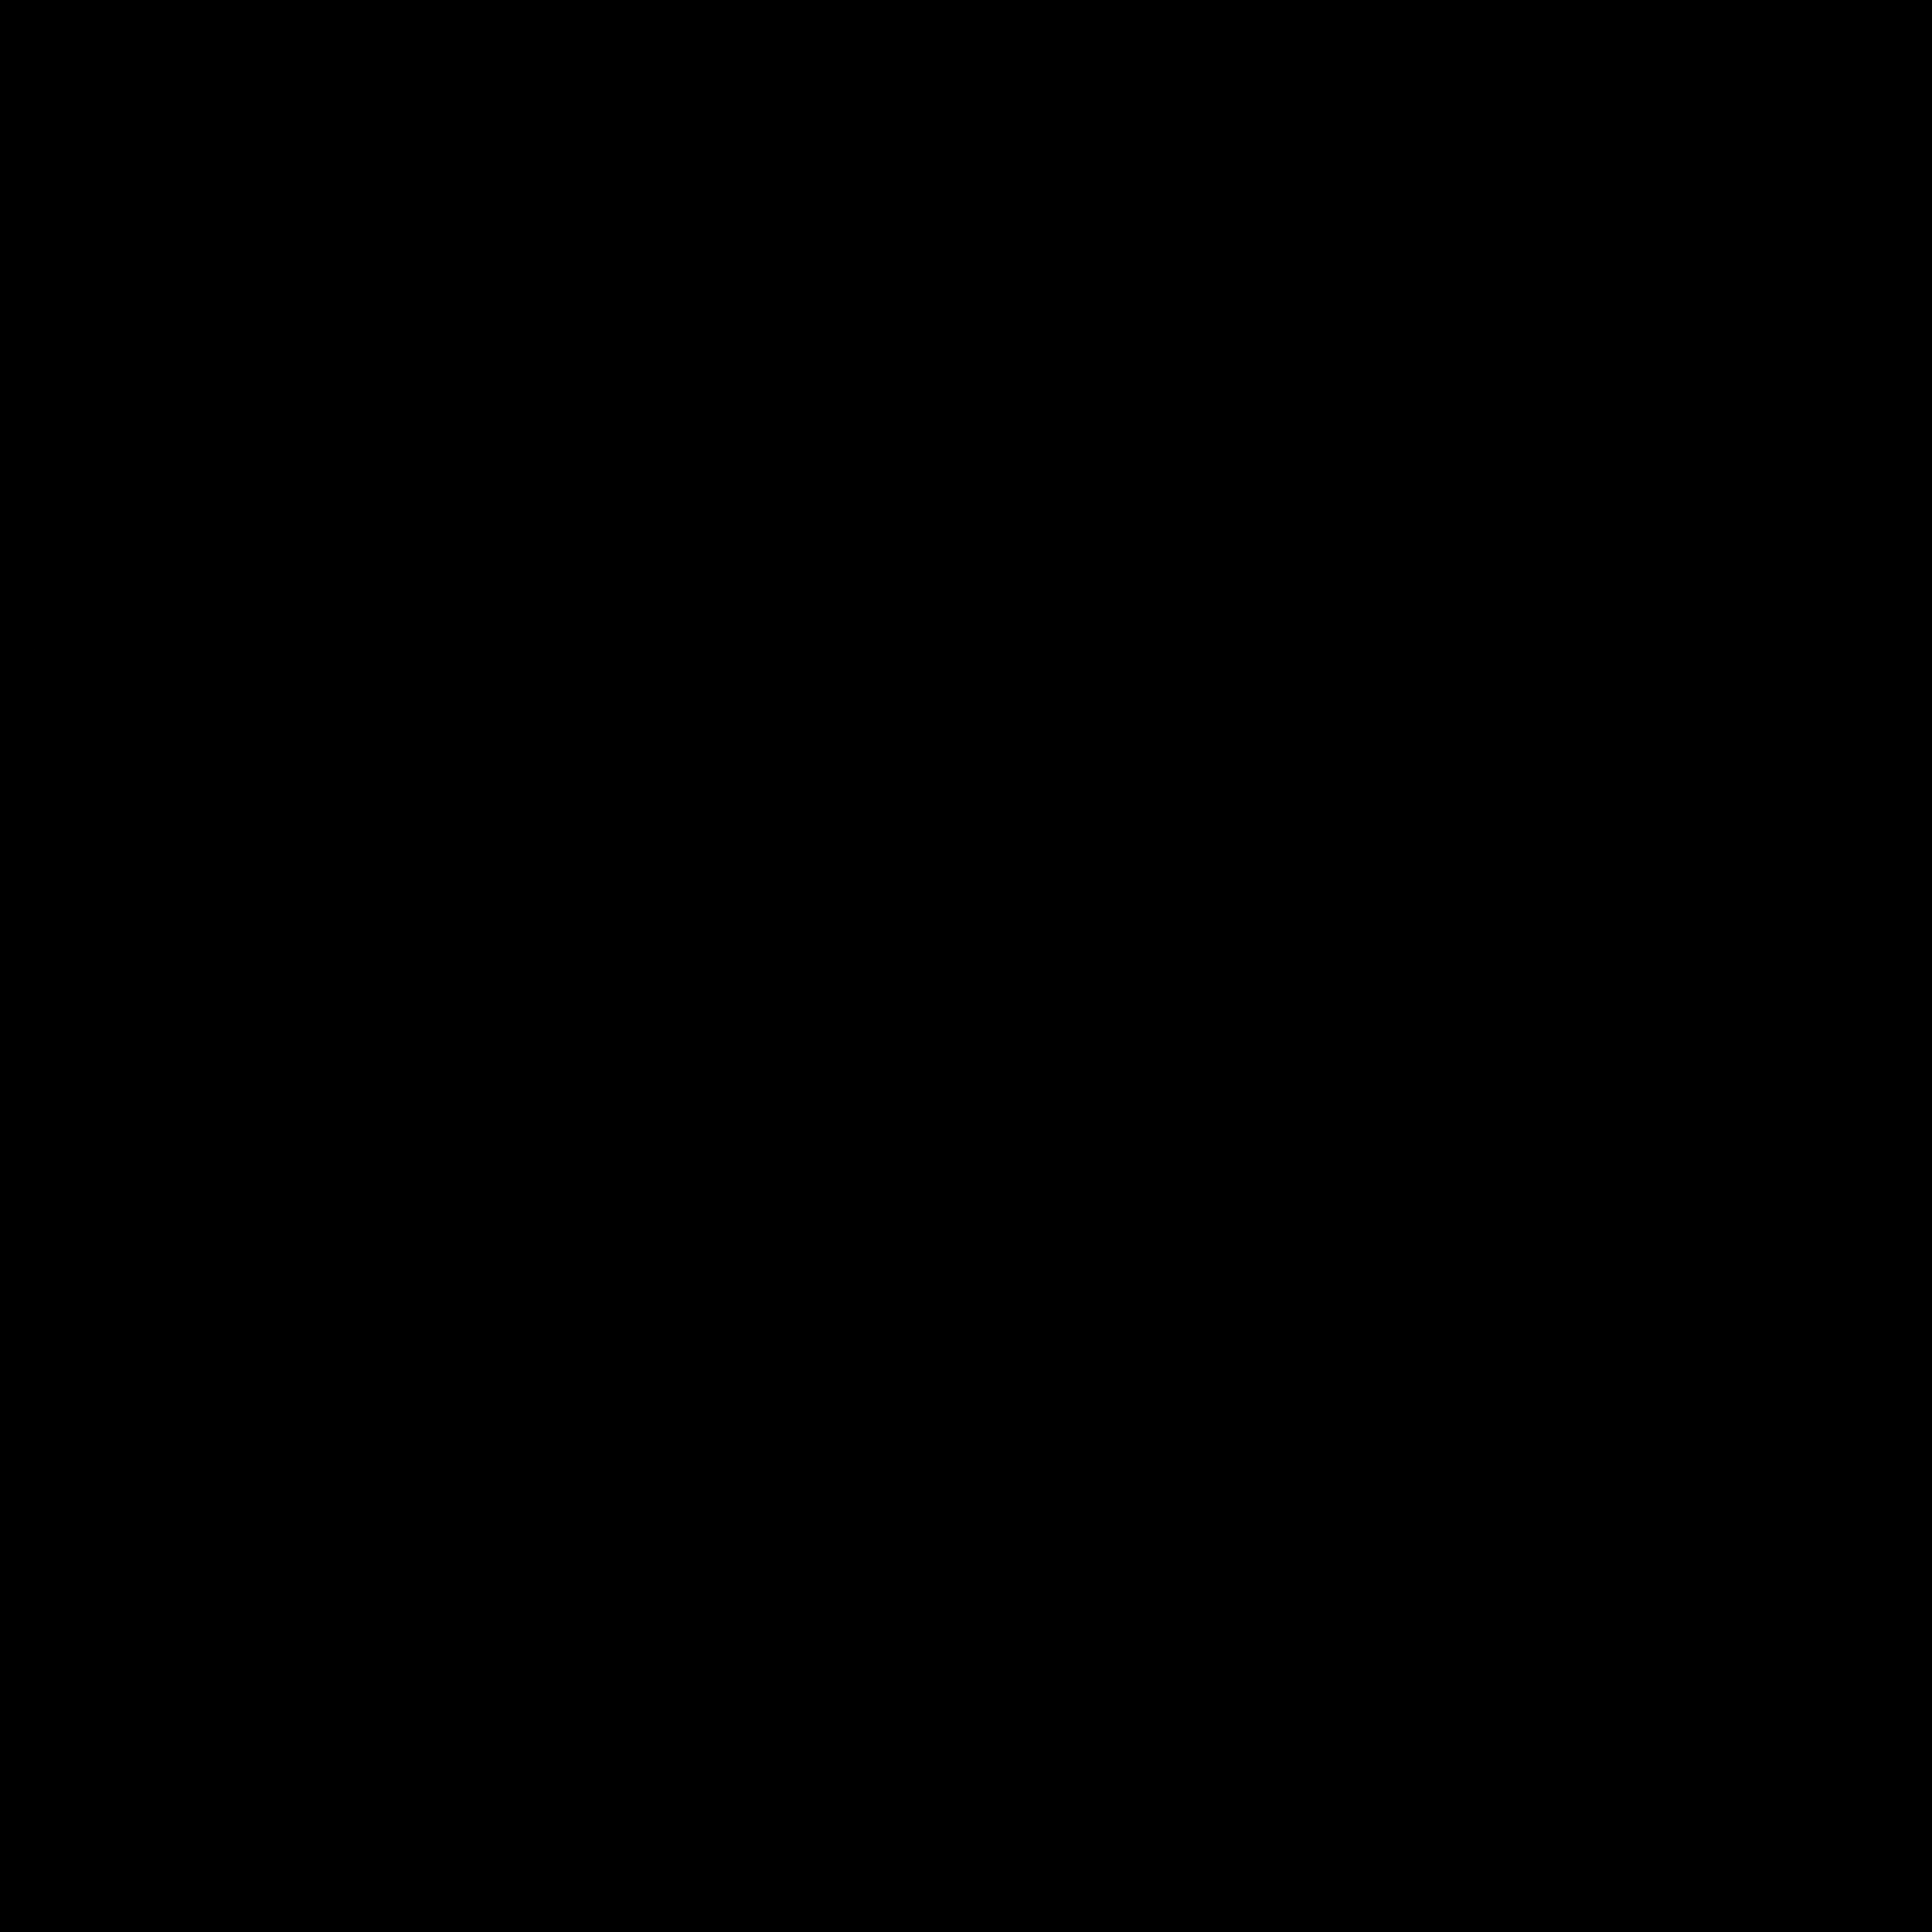

-1

In [11]:
cv2_imshow(im/im.max()) # 'Ulazna slika', 
cv2.waitKey(0)
# cv2.destroyAllWindows()

1.4 Napraviti histogram slike u granicama od 0 do 16384 sa korakom 8.

In [12]:
g = np.arange(0, 16385, 8)
h1 = np.histogram(im, g)

1.5 Prikazati histogram. Kako izgleda raspodela i kako se to odražava na izgled snimka?

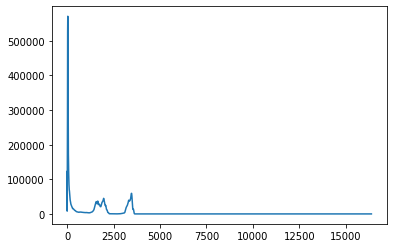

In [13]:
plt.figure()
plt.plot(g[:-1], h1[0])
plt.show()


# 2. Logaritamska kompresija opsega

2.1 U modulu osum.py napraviti funkciju log_LUT u kojoj se pravi look-up tabela sa logaritamskom kompresijom opsega. Ulazni parametri funkcije su ulazni opseg, izlazni opseg i tolerancija do koje se komprimuje linearno.

2.2 Napraviti LUT za logaritamsku kompresiju opsega tako da se ulazni opseg od 16384 pretvori u opseg 4096 sa tolerancijom 0.001. Primeniti LUT na ulaznu sliku.

In [14]:
lut = osum.log_LUT(16384, 4096, 0.001)
# lut = osum.log_LUT(16384, 4096, 0.1) # 2.5
im_log = lut[im]

2.3 Prikazati sliku nakon logaritamske kompresije opsega. Koji je efekat ove
transformacije?

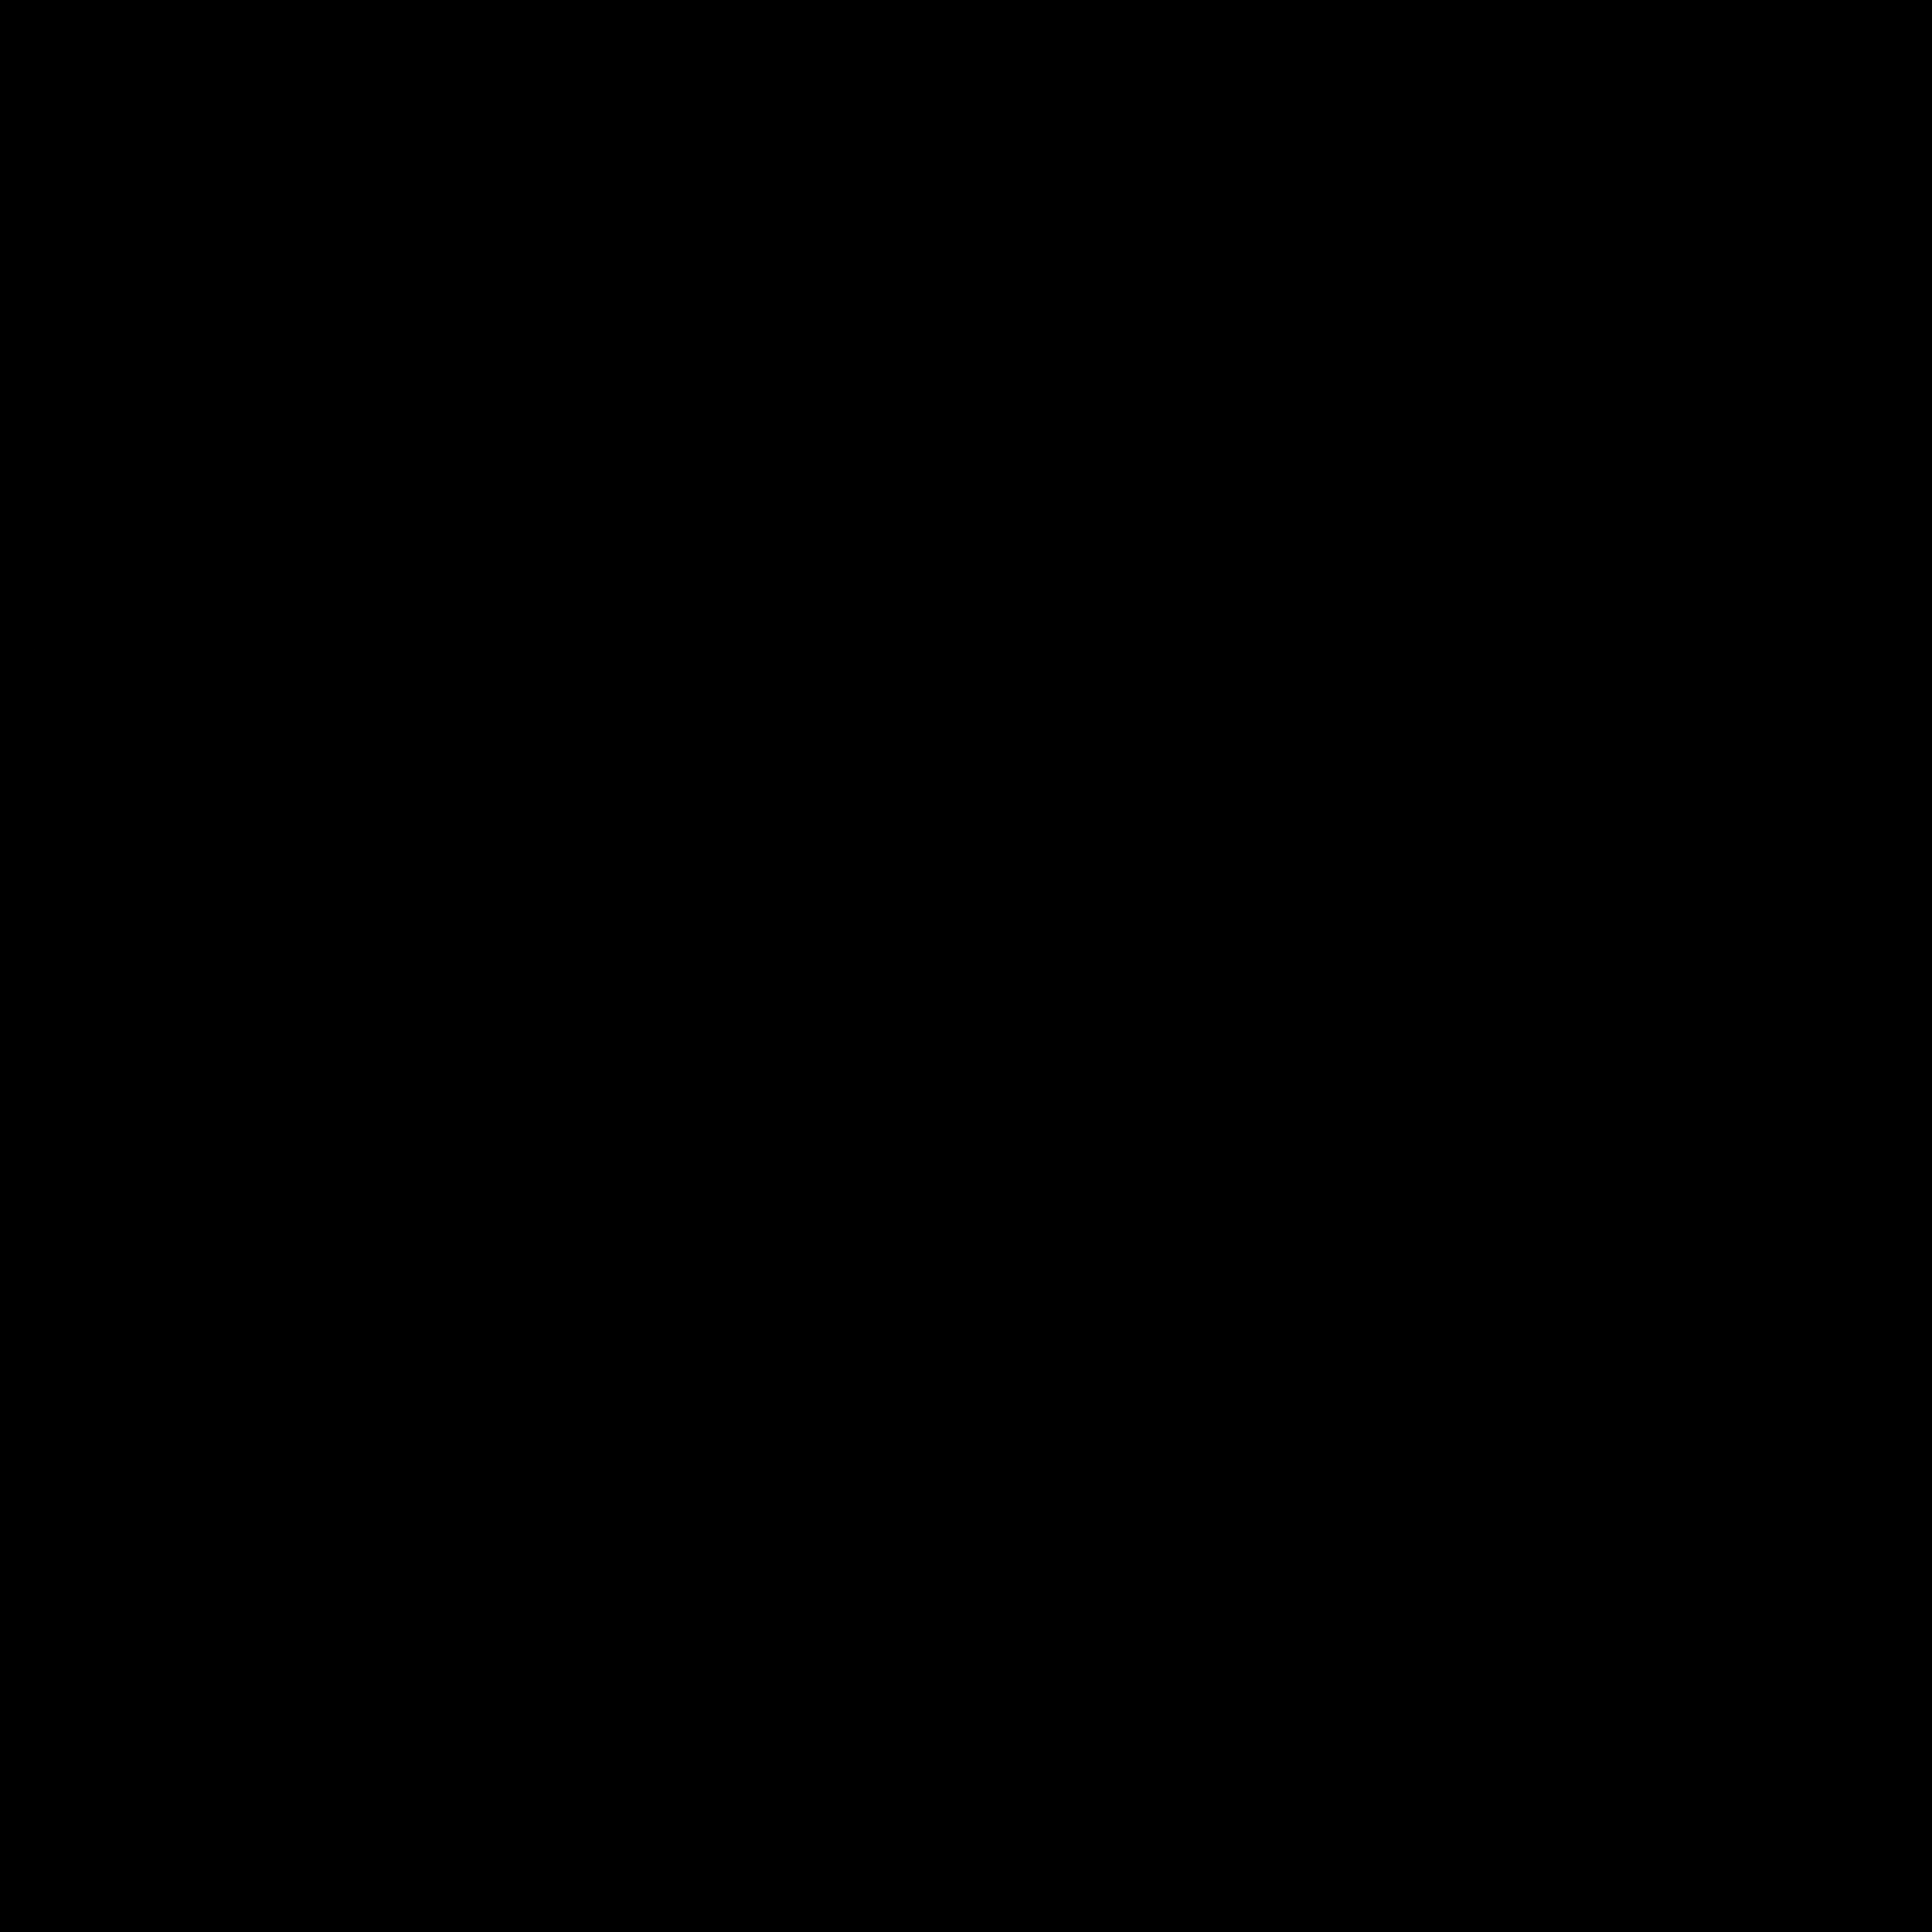

In [15]:
cv2_imshow(im_log/im_log.max()) # 'Slika nakon log kompresije opsega', 
cv2.waitKey(0)
cv2.destroyAllWindows()

2.4 Napraviti histogram slike nakon primenjene transformacije i na istom grafiku prikazati histogram pre i nakon transformacije. Kako se razlikuju raspodele?

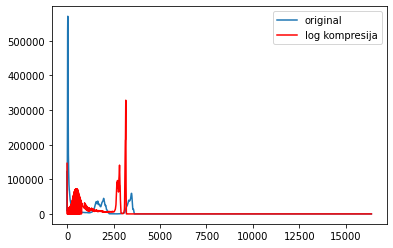

In [16]:
h2 = np.histogram(im_log, g)

plt.figure()
plt.plot(g[:-1], h1[0])
plt.plot(g[:-1], h2[0], 'r')
plt.legend(['original', 'log kompresija'])
plt.show()

2.5 Ponoviti korak 2.2 koristeći toleranciju od 0.1. Prikazati sliku. Zašto se vidi manje struktura?